In [21]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation"

In [22]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,
                                  height_shift_range=0.2, validation_split=0.2)

In [23]:
batchsize=8

In [24]:
train_data= train_datagen.flow_from_directory(r'C:\Users\USER\Downloads\mrlEyes_2018_01\Prepared_Data\train',target_size=(80,80)
                                              ,batch_size=8,class_mode='categorical',subset='training')


Found 63975 images belonging to 2 classes.


In [25]:
validation_data= train_datagen.flow_from_directory(r'C:\Users\USER\Downloads\mrlEyes_2018_01\Prepared_Data\train',
 target_size=(80,80),batch_size=8,class_mode='categorical', subset='validation')

Found 15992 images belonging to 2 classes.


In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(r'C:\Users\USER\Downloads\mrlEyes_2018_01\Prepared_Data\test',target_size=(80,80)
                                             ,batch_size=8,class_mode='categorical')

Found 4931 images belonging to 2 classes.


In [28]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3),batch_size=8))
#bmodel.summary()

In [29]:
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)
model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [32]:
checkpoint = ModelCheckpoint(r'C:\Users\USER\Downloads\mrlEyes_2018_01\Model',monitor='val_loss',save_best_only=True,verbose=3)
earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)#stop the training when there is no more changes in the value
learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3)
callbacks=[checkpoint,earlystop,learning_rate]

In [33]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,validation_data=validation_data,
                    validation_steps=validation_data.samples//batchsize,callbacks=callbacks,epochs=5)

C:\Users\USER\AppData\Local\Temp\ipykernel_11184\19591306.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,validation_data=validation_data,


Epoch 1/5
7996/7996 [==============================] - ETA: 0s - loss: 0.1851 - accuracy: 0.9291
Epoch 1: val_loss improved from inf to 0.27124, saving model to C:\Users\USER\Downloads\mrlEyes_2018_01\Model
INFO:tensorflow:Assets written to: C:\Users\USER\Downloads\mrlEyes_2018_01\Model\assets


INFO:tensorflow:Assets written to: C:\Users\USER\Downloads\mrlEyes_2018_01\Model\assets


7996/7996 [==============================] - 3820s 477ms/step - loss: 0.1851 - accuracy: 0.9291 - val_loss: 0.2712 - val_accuracy: 0.9011 - lr: 0.0010
Epoch 2/5
7996/7996 [==============================] - ETA: 0s - loss: 0.1616 - accuracy: 0.9375
Epoch 2: val_loss improved from 0.27124 to 0.24574, saving model to C:\Users\USER\Downloads\mrlEyes_2018_01\Model
INFO:tensorflow:Assets written to: C:\Users\USER\Downloads\mrlEyes_2018_01\Model\assets


INFO:tensorflow:Assets written to: C:\Users\USER\Downloads\mrlEyes_2018_01\Model\assets


7996/7996 [==============================] - 2787s 349ms/step - loss: 0.1616 - accuracy: 0.9375 - val_loss: 0.2457 - val_accuracy: 0.9027 - lr: 0.0010
Epoch 3/5
7996/7996 [==============================] - ETA: 0s - loss: 0.1522 - accuracy: 0.9423
Epoch 3: val_loss did not improve from 0.24574
7996/7996 [==============================] - 2158s 270ms/step - loss: 0.1522 - accuracy: 0.9423 - val_loss: 0.2650 - val_accuracy: 0.9085 - lr: 0.0010
Epoch 4/5
7996/7996 [==============================] - ETA: 0s - loss: 0.1483 - accuracy: 0.9425
Epoch 4: val_loss did not improve from 0.24574
7996/7996 [==============================] - 4996s 625ms/step - loss: 0.1483 - accuracy: 0.9425 - val_loss: 0.3236 - val_accuracy: 0.8961 - lr: 0.0010
Epoch 5/5
7996/7996 [==============================] - ETA: 0s - loss: 0.1475 - accuracy: 0.9433
Epoch 5: val_loss did not improve from 0.24574

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
7996/7996 [==========================

In [36]:

import matplotlib.pyplot as plt

In [35]:
acc_tr, loss_tr = model.evaluate_generator(train_data)
print(acc_tr)
print(loss_tr)

C:\Users\USER\AppData\Local\Temp\ipykernel_11184\713691994.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_tr, loss_tr = model.evaluate_generator(train_data)


0.1239389106631279
0.9527471661567688


In [37]:
acc_vr, loss_vr = model.evaluate_generator(validation_data)
print(acc_vr)
print(loss_vr)

C:\Users\USER\AppData\Local\Temp\ipykernel_11184\4081756742.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_vr, loss_vr = model.evaluate_generator(validation_data)


0.24707037210464478
0.9104552268981934


In [38]:
acc_test, loss_test = model.evaluate_generator(test_data)
print(acc_tr)
print(loss_tr)

C:\Users\USER\AppData\Local\Temp\ipykernel_11184\3655471885.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_test, loss_test = model.evaluate_generator(test_data)


0.1239389106631279
0.9527471661567688


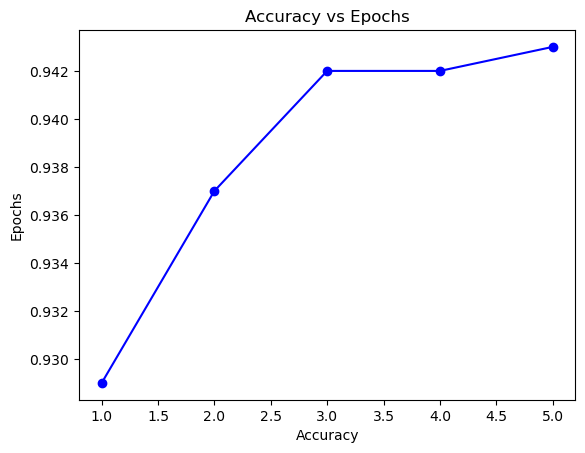

In [ ]:
import numpy as np
accuracy=[0.929,0.937,0.942,0.9425,0.943]
epochs=np.arange(1,6)

x=accuracy
y=epochs
#plt.plot(x,y,"r--")
plt.plot(epochs,acc,marker='o',linestyle='-',color='b')
plt.title("Accuracy vs Epochs")#title
plt.xlabel("Epochs")#labeling x and y axis
plt.ylabel("Accuracy")
plt.show()



In [65]:
bmodel.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(8, 80, 80, 3)]             0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (8, 39, 39, 32)              864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (8, 39, 39, 32)              96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (8, 39, 39, 32)              0         ['batch_normalizati

In [66]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(8, 80, 80, 3)]             0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (8, 39, 39, 32)              864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (8, 39, 39, 32)              96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (8, 39, 39, 32)              0         ['batch_normalization_18